In [1]:
import numpy as np

def distance(x1, y1, x2, y2):
    return np.math.sqrt(((x1 - x2) ** 2) + ((y1 - y2) ** 2))

In [2]:
import pandas as pd
import os

directory = 'testData'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        print('---------------------------------------------------------')
        print(f)
        print('---------------------------------------------------------\n')
        df = pd.read_csv(f)
        print(df.head())
        

---------------------------------------------------------

testData\data0.csv
---------------------------------------------------------

   frameNumber  windowSize  XYError  timeToFuture  currentCenterX  \
0            0           4       10             1             238   
1            1           4       10             1             239   
2            2           4       10             1             240   
3            3           4       10             1             242   
4            4           4       10             1             245   

   currentCenterY  leftShoulderX  leftShoulderY  rightShoulderX  \
0             240            256            224             220   
1             246            257            224             221   
2             244            260            224             221   
3             244            262            224             223   
4             244            265            223             225   

   rightShoulderY  angleOfApproach  XFrameSpe

Prediction accuracy v/s Radius from actual location


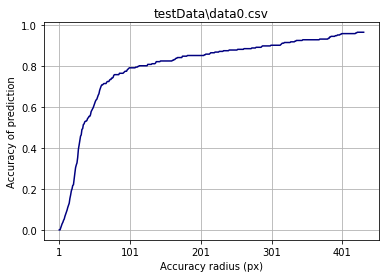

Accuracy at 50px radius : 0.6187290969899666


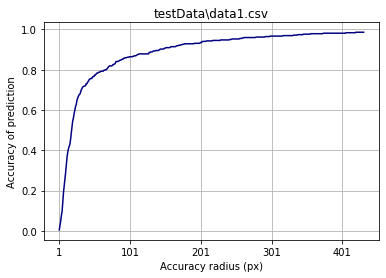

Accuracy at 50px radius : 0.7732696897374701


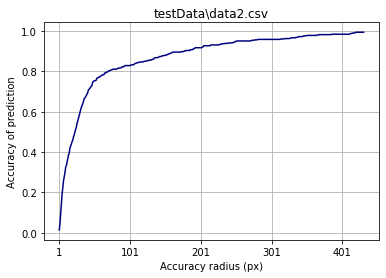

Accuracy at 50px radius : 0.7539370078740157


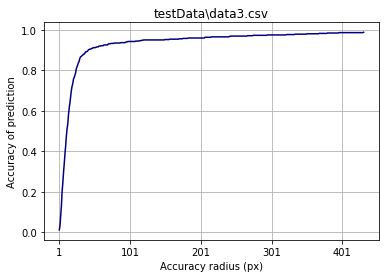

Accuracy at 50px radius : 0.9125475285171103


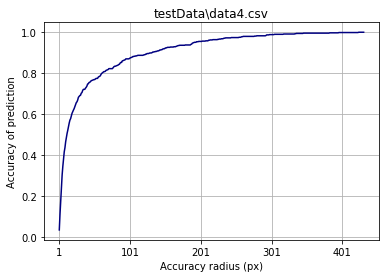

Accuracy at 50px radius : 0.7673410404624278


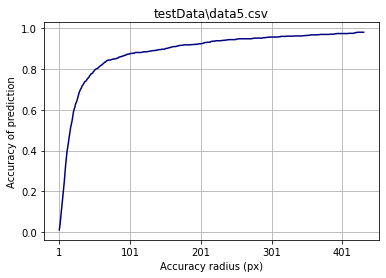

Accuracy at 50px radius : 0.7944621938232161


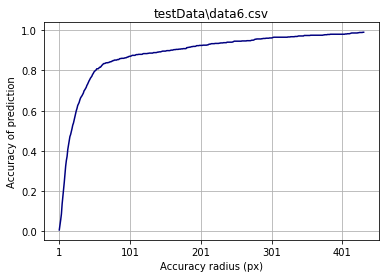

Accuracy at 50px radius : 0.7962962962962963


In [3]:
import matplotlib.pyplot as plt 

# mapping accuracy rates based on radii from actual locations
thresholdRadii = list(range(1, 432)) # 432 being the smaller of the two window dimensions

directory = 'testData'
print('Prediction accuracy v/s Radius from actual location')
for filename in os.listdir(directory):
    
    f = os.path.join(directory, filename)
    
    if os.path.isfile(f):
        
        df = pd.read_csv(f)
        accuracyDict = dict()

        for thresholdRadius in thresholdRadii:

            accuratePred = []
            for j in range(1, len(df)):

                x1 = df['currentCenterX'][j]
                y1 = df['currentCenterY'][j]
                x2 = df['predictedX'][j - 1]
                y2 = df['predictedY'][j - 1]

                if distance(x1, y1, x2, y2) < thresholdRadius:
                    accuratePred.append(True)
                else:
                    accuratePred.append(False)

                accuracy = accuratePred.count(True) / len(accuratePred)

            accuracyDict[str(thresholdRadius)] = accuracy

        accuracySeries = pd.Series(accuracyDict)
        ax = accuracySeries.plot(colormap='jet', grid=True, title=f)
        ax.set_xlabel("Accuracy radius (px)")
        ax.set_ylabel("Accuracy of prediction")
        plt.show()
        print('Accuracy at 50px radius : ' + str(accuracySeries[50]))